# Random sampling

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Distributions

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html#distributions

(10000,)
[6 4 6 ... 5 6 4]


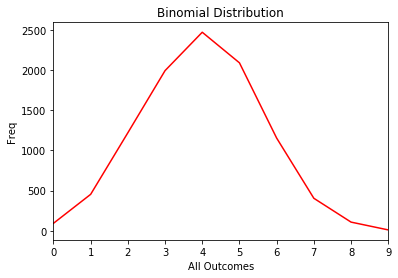

In [2]:
# Draw samples from a binomial distribution.

"""
https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.binomial.html#numpy.random.RandomState.binomial
"""

# number of trials, probability of success for each trial, size
trials, probability, test = 10, .5, 10000
outcomes = np.random.binomial(trials, probability, test)
print(outcomes.shape)
print(outcomes)

all_outcome = range(trials)
freq = np.zeros(trials)
for outcome in all_outcome:
    for a_outcome in outcomes:
        if outcome == a_outcome:
            freq[outcome-1] += 1

plt.plot(all_outcome, freq, 'r')
plt.title("Binomial Distribution")
plt.xlabel('All Outcomes')
plt.ylabel('Freq')
plt.xlim([0, trials-1])
plt.show()